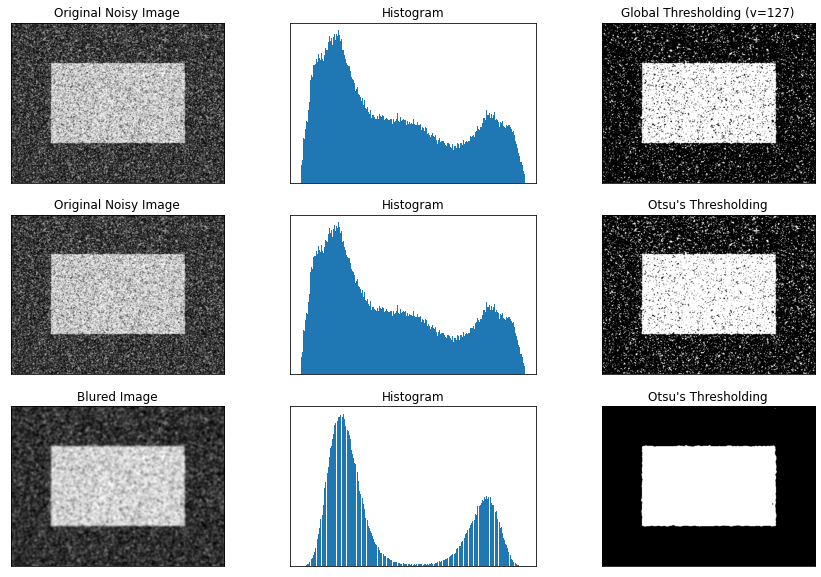

In [10]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('./images/noise-02.png')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

ret1, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
ret2, th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
blur = cv.GaussianBlur(img, (13,13), 0)
ret3, th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

images = [
    [img, 0, th1],
    [img, 0, th2], 
    [blur, 0, th3]
]
titles = [
    ['Original Noisy Image', 'Histogram', 'Global Thresholding (v=127)'],
    ['Original Noisy Image', 'Histogram', "Otsu's Thresholding"],
    ['Blured Image', 'Histogram', "Otsu's Thresholding"],
]

plt.figure(figsize=[15, 10])
for i in range(3):
    plt.subplot(3,3,i*3+1), plt.imshow(images[i][0], 'gray'), 
    plt.title(titles[i][0]), plt.xticks([]), plt.yticks([])

    plt.subplot(3,3,i*3+2), plt.hist(images[i][0].ravel(), 256), 
    plt.title(titles[i][1]), plt.xticks([]), plt.yticks([])

    plt.subplot(3,3,i*3+3), plt.imshow(images[i][2], 'gray'), 
    plt.title(titles[i][2]), plt.xticks([]), plt.yticks([])

plt.show()